In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder
from sklearn.metrics.pairwise import cosine_similarity as cos
from sklearn.preprocessing import LabelEncoder




In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Final_Project/indian_food.csv")
data

data.info()

data.isna ().sum()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


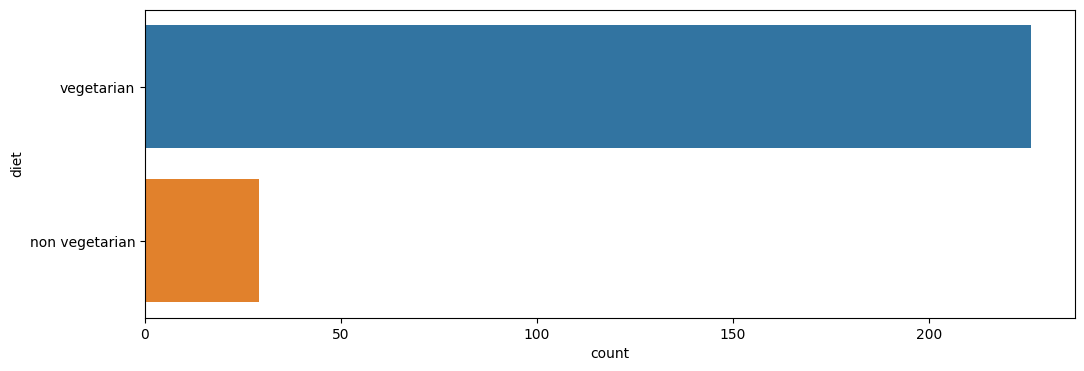

In [ ]:
## data cleaning 

plt.figure(figsize=(12,4))
sns.countplot(data=data,y="diet")
plt.show()




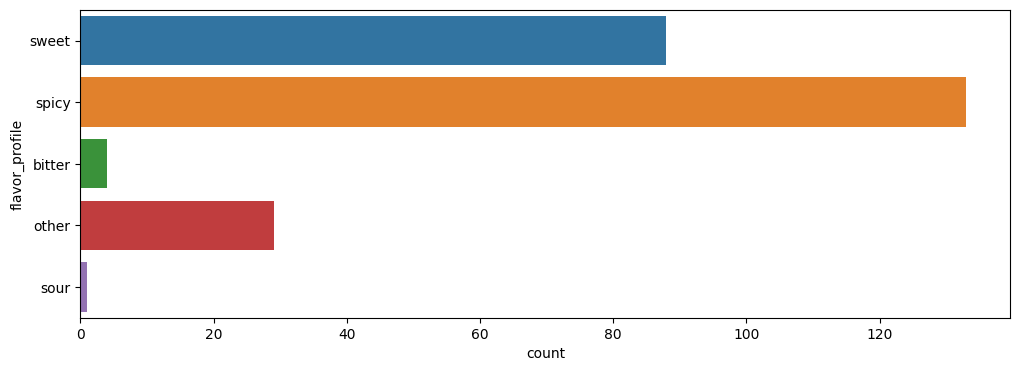

In [ ]:
plt.figure(figsize=(12,4))
data["flavor_profile"].replace({"-1":"other"},inplace=True)
sns.countplot(data=data,y="flavor_profile")
plt.show()




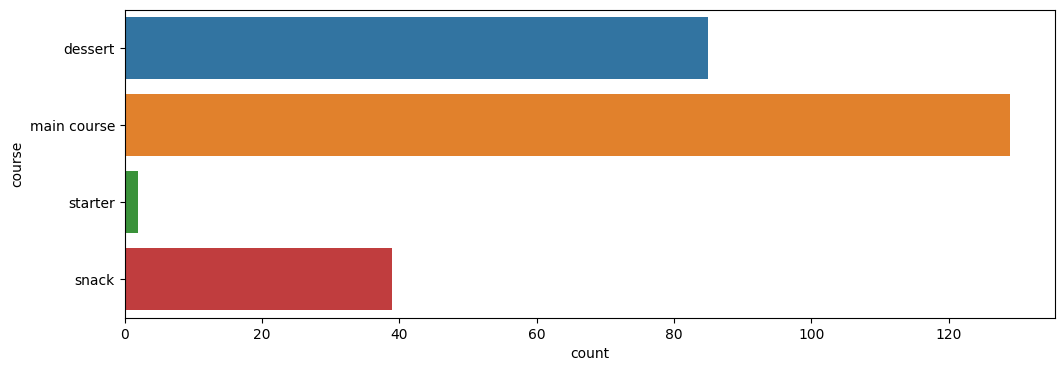

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(data=data,y="course")
plt.show()



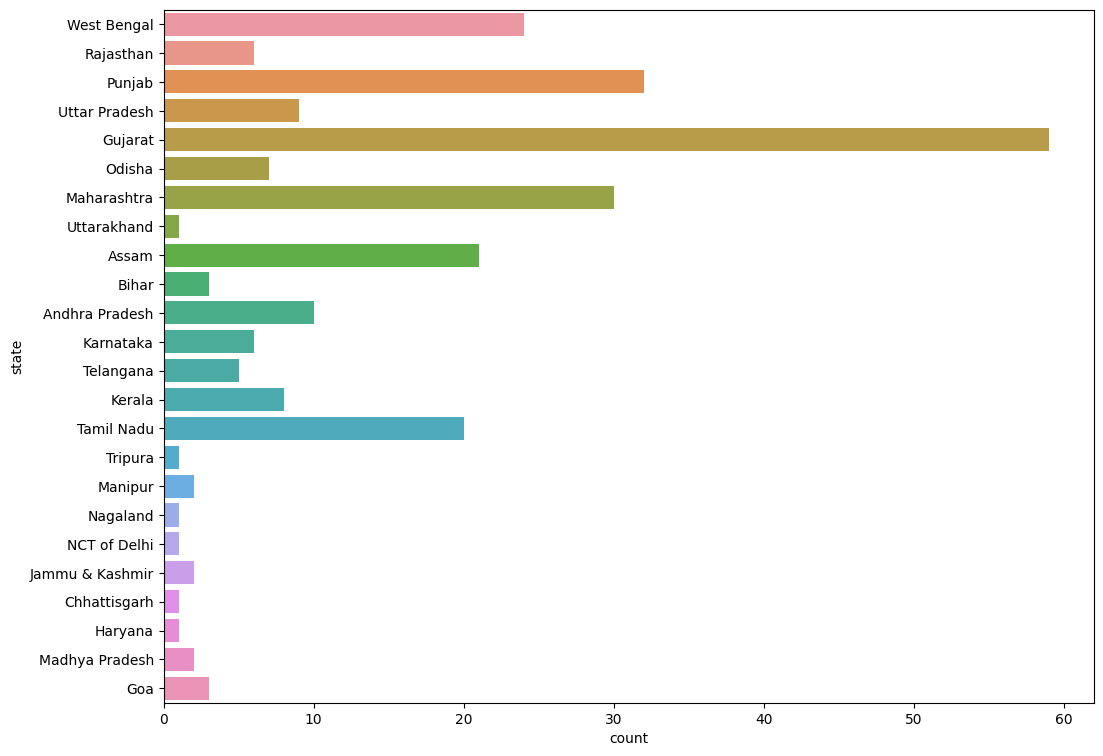

In [ ]:
plt.figure(figsize=(12,9))
data["state"].replace({"-1":data['state'].mode()[0]},inplace=True)
sns.countplot(data=data,y="state")
plt.show()



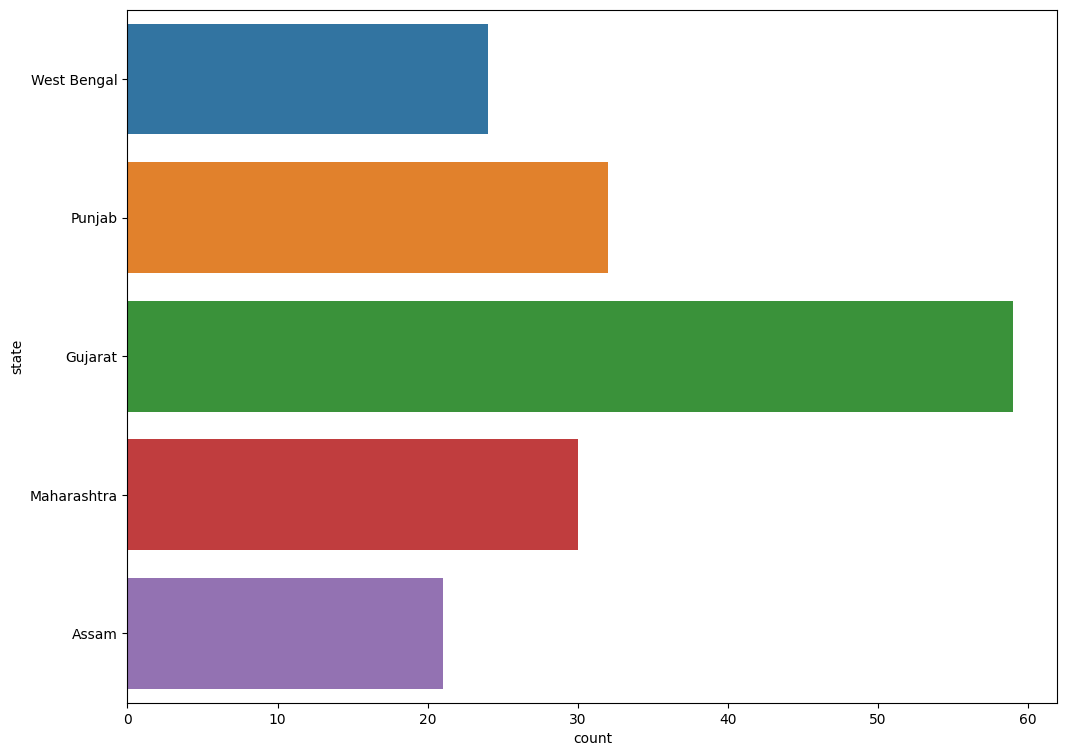

In [ ]:
top_states = data['state'].value_counts().nlargest(5).index

# create a countplot showing only the top 5 states
plt.figure(figsize=(12, 9))
sns.countplot(data=data[data['state'].isin(top_states)], y="state")
plt.show()

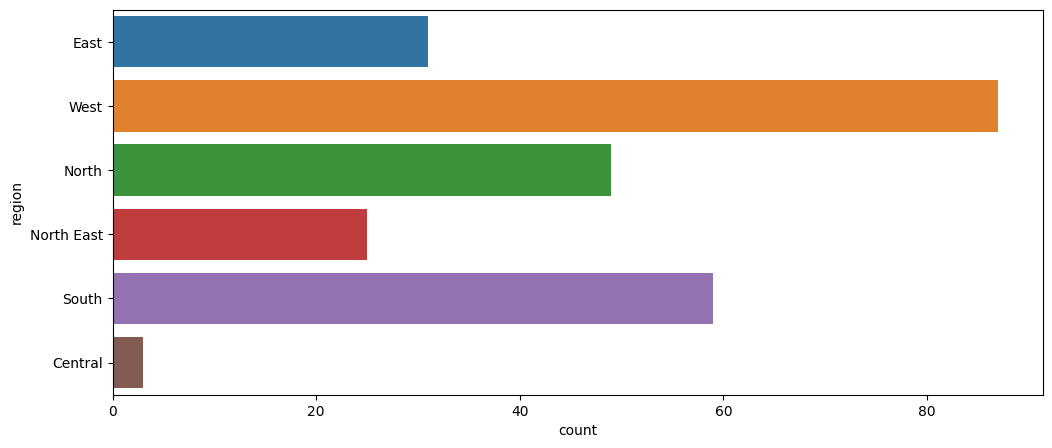

In [ ]:
plt.figure(figsize=(12,5))
data["region"].replace({"-1":data['region'].mode()[0]},inplace=True)
sns.countplot(data=data,y="region")
plt.show()

In [ ]:
data["prep_time"].replace({-1:0},inplace=True)
data["cook_time"].replace({-1:0},inplace=True)
data

data.to_csv("processed_indian_food.csv",index=False)

data_t = data.copy()
data = data[["name","ingredients"]]
data

data["name"].value_counts()



Balu shahi         1
Chorafali          1
Vada               1
Chicken Varuval    1
Upma               1
                  ..
Kachori            1
Kadai paneer       1
Kadhi pakoda       1
Karela bharta      1
Pinaca             1
Name: name, Length: 255, dtype: int64

In [ ]:
# Analyzing the popularity of each product 

ings = pd.Series(",".join(data["ingredients"].values).split(","))
ings =  ings.apply(lambda x: x.lower().strip())
popularity = {}
temp = ings.value_counts()
for j,i in enumerate(temp):
    popularity[temp.index[j]] = i
    print(temp.index[j],":",i)

    

k = list(popularity.keys())
k.sort()
k

sugar : 48
ginger : 29
garam masala : 27
ghee : 25
urad dal : 25
curry leaves : 25
milk : 21
jaggery : 21
rice flour : 21
chana dal : 16
tomato : 16
gram flour : 13
garam masala powder : 13
mustard oil : 12
whole wheat flour : 12
wheat flour : 12
coconut : 12
potato : 11
sesame seeds : 11
saffron : 10
turmeric : 10
rice : 10
clarified butter : 9
semolina : 9
mustard seeds : 9
cardamom : 9
lemon juice : 8
garlic : 8
yogurt : 8
curd : 8
baking soda : 8
all purpose flour : 7
grated coconut : 7
tomatoes : 7
salt : 7
moong dal : 7
bengal gram flour : 7
potatoes : 7
butter : 7
rava : 6
gur : 6
cream : 6
kasuri methi : 6
raisins : 6
chillies : 6
coconut oil : 6
chicken : 6
green chili : 6
green chilies : 6
lemon : 6
cashew nuts : 6
cinnamon : 6
chhena : 6
tamarind : 5
nuts : 5
hot water : 5
black pepper : 5
chili powder : 5
arhar dal : 5
besan : 5
olive oil : 5
bottle gourd : 5
green peas : 5
cashews : 5
oil : 5
cottage cheese : 5
fennel seeds : 5
cucumber : 4
flour : 4
mustard : 4
sev : 4
pi

['all purpose flour',
 'almond',
 'almonds',
 'aloo',
 'alum powder',
 'amaranth leaves',
 'amchur powder',
 'apricots',
 'arbi ke patte',
 'arhar dal',
 'arrowroot powder',
 'atta',
 'avocado oil',
 'axone',
 'baby corn',
 'baby potatoes',
 'badam',
 'baingan',
 'baking powder',
 'baking soda',
 'banana',
 'banana flower',
 'basmati rice',
 'bay leaf',
 'beans',
 'beaten rice flakes',
 'beef',
 'beetroot',
 'bell pepper',
 'bell peppers',
 'bengal gram flour',
 'besan',
 'besan flour',
 'bhatura',
 'bhuna chana',
 'biryani masala',
 'biryani masala powder',
 'bitter gourd',
 'black lentils',
 'black pepper',
 'black salt',
 'black sesame seeds',
 'blend rice',
 'boiled pork',
 'boiled potatoes',
 'bombay duck',
 'bombay rava',
 'boondi',
 'bottle gourd',
 'bread crumbs',
 'brinjal',
 'brown rice',
 'brown rice flour',
 'butter',
 'cabbage',
 'canned coconut milk',
 'capsicum',
 'cardamom',
 'cardamom pods',
 'cardamom powder',
 'carrot',
 'carrots',
 'cashew nuts',
 'cashews',
 'cashe

# Input Data preparation for similarity recommendation

In [ ]:
ingredients = []
for i in data.index:
    temp = []
    for j in data.iloc[i,1].split(","):
        if str(j) != "nan":
            temp.append(j.lower().strip())
    ingredients.append(temp)
ingredients[:5]

[['maida flour', 'yogurt', 'oil', 'sugar'],
 ['gram flour', 'ghee', 'sugar'],
 ['carrots', 'milk', 'sugar', 'ghee', 'cashews', 'raisins'],
 ['flour',
  'ghee',
  'kewra',
  'milk',
  'clarified butter',
  'sugar',
  'almonds',
  'pistachio',
  'saffron',
  'green cardamom'],
 ['milk powder',
  'plain flour',
  'baking powder',
  'ghee',
  'milk',
  'sugar',
  'water',
  'rose water']]

In [ ]:
ing = [] 
for i in ingredients:
    temp = []
    for j in i:
        if j == "almond":
            j = "almonds"
        temp.append(j)
    ing.append(temp)
ing

[['maida flour', 'yogurt', 'oil', 'sugar'],
 ['gram flour', 'ghee', 'sugar'],
 ['carrots', 'milk', 'sugar', 'ghee', 'cashews', 'raisins'],
 ['flour',
  'ghee',
  'kewra',
  'milk',
  'clarified butter',
  'sugar',
  'almonds',
  'pistachio',
  'saffron',
  'green cardamom'],
 ['milk powder',
  'plain flour',
  'baking powder',
  'ghee',
  'milk',
  'sugar',
  'water',
  'rose water'],
 ['sugar syrup', 'lentil flour'],
 ['maida',
  'corn flour',
  'baking soda',
  'vinegar',
  'curd',
  'water',
  'turmeric',
  'saffron',
  'cardamom'],
 ['cashews', 'ghee', 'cardamom', 'sugar'],
 ['milk', 'cottage cheese', 'sugar'],
 ['milk', 'rice', 'sugar', 'dried fruits'],
 ['gram flour', 'ghee', 'sugar'],
 ['yogurt', 'milk', 'nuts', 'sugar'],
 ['refined flour',
  'besan',
  'ghee',
  'powdered sugar',
  'yoghurt',
  'green cardamom'],
 ['firm white pumpkin', 'sugar', 'kitchen lime', 'alum powder'],
 ['rice', 'sugar', 'nuts'],
 ['condensed milk', 'sugar', 'spices', 'nuts'],
 ['semolina', 'ghee', 'nut

In [ ]:
te = TransactionEncoder()
te_ary = te.fit_transform(ing)
te_ary = te_ary.astype("int")
te_ary

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
te.columns_

['all purpose flour',
 'almonds',
 'aloo',
 'alum powder',
 'amaranth leaves',
 'amchur powder',
 'apricots',
 'arbi ke patte',
 'arhar dal',
 'arrowroot powder',
 'atta',
 'avocado oil',
 'axone',
 'baby corn',
 'baby potatoes',
 'badam',
 'baingan',
 'baking powder',
 'baking soda',
 'banana',
 'banana flower',
 'basmati rice',
 'bay leaf',
 'beans',
 'beaten rice flakes',
 'beef',
 'beetroot',
 'bell pepper',
 'bell peppers',
 'bengal gram flour',
 'besan',
 'besan flour',
 'bhatura',
 'bhuna chana',
 'biryani masala',
 'biryani masala powder',
 'bitter gourd',
 'black lentils',
 'black pepper',
 'black salt',
 'black sesame seeds',
 'blend rice',
 'boiled pork',
 'boiled potatoes',
 'bombay duck',
 'bombay rava',
 'boondi',
 'bottle gourd',
 'bread crumbs',
 'brinjal',
 'brown rice',
 'brown rice flour',
 'butter',
 'cabbage',
 'canned coconut milk',
 'capsicum',
 'cardamom',
 'cardamom pods',
 'cardamom powder',
 'carrot',
 'carrots',
 'cashew nuts',
 'cashews',
 'cashews and rais

In [ ]:
trans_data = pd.DataFrame(te_ary, columns=te.columns_)
trans_data

,all purpose flour,almonds,aloo,alum powder,amaranth leaves,amchur powder,apricots,arbi ke patte,arhar dal,arrowroot powder,...,whole urad dal,whole wheat bread,whole wheat flour,whole wheat rava,wild mushrooms,wine vinegar,yellow moong daal,yellow mustard,yoghurt,yogurt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Output Data preparation for similarity recommendation

In [ ]:
enc = LabelEncoder()
enc_output = enc.fit_transform(data["name"])
recom_trans_data = trans_data.copy()
recom_trans_data["recomm"] = enc_output
recom_trans_data

,all purpose flour,almonds,aloo,alum powder,amaranth leaves,amchur powder,apricots,arbi ke patte,arhar dal,arrowroot powder,...,whole wheat bread,whole wheat flour,whole wheat rava,wild mushrooms,wine vinegar,yellow moong daal,yellow mustard,yoghurt,yogurt,recomm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,13
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,71
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,76
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,244
251,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,230
253,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,151


In [ ]:
recom_trans_data.to_csv("processed_data.csv",index=False)
import joblib 
joblib.dump(te,"trans_encoder.sav")
joblib.dump(enc,"label_encoder.sav")

['label_encoder.sav']

# Building the Algorithm for recommendation

### 1. Experimentation

In [ ]:
in_ing = ["sugar","all purpose flour"]
in_x = te.transform([in_ing]).astype("int")
values = []
for i in trans_data.index: 
        x = np.array(in_x).reshape(1,-1)
        y = trans_data.iloc[i].values.reshape(1,-1)
        cosine = cos(x,y)
        values.append(cosine[0][0])
result = list(zip(recom_trans_data["recomm"].values,values))
fin = sorted(result,key= lambda x : x[1],reverse=True)
fin = list(filter(lambda x : x[1] != 1.0 and x[1] != 0,fin))
if len(fin)>9:
        rec = 9
else:
        rec = len(fin)
neighbours = []
for n in range(rec):
        neighbours.append(enc.inverse_transform([fin[n][0]])[0])
neighbours
output_recom = []
for i in neighbours:
        total_op = data_t[data_t["name"]==i]
        c = f'''
{"*"*50}
"{total_op["name"].values[0]}"
---------------------------------------------
ingredients: {total_op["ingredients"].values[0]}
diet: {total_op["diet"].values[0]}
flavor_profile: {total_op["flavor_profile"].values[0]}
course: {total_op["course"].values[0]}
from location: {total_op["state"].values[0]} state,{total_op["region"].values[0]} region
total time to create recipe: {total_op["prep_time"].values[0]+total_op["cook_time"].values[0]} mins
'''+"*"*50
        output_recom.append(c)

In [ ]:
output_recom

['\n**************************************************\n"Chhena poda"\n---------------------------------------------\ningredients: Sugar, chenna cheese\ndiet: vegetarian\nflavor_profile: sweet\ncourse: dessert\nfrom location: Odisha state,East region\ntotal time to create recipe: 55 mins\n**************************************************',
 '\n**************************************************\n"Kakinada khaja"\n---------------------------------------------\ningredients: Wheat flour, sugar\ndiet: vegetarian\nflavor_profile: sweet\ncourse: dessert\nfrom location: Andhra Pradesh state,South region\ntotal time to create recipe: 40 mins\n**************************************************',
 '\n**************************************************\n"Mahim halwa"\n---------------------------------------------\ningredients: Semolina, sugar\ndiet: vegetarian\nflavor_profile: sweet\ncourse: dessert\nfrom location: Maharashtra state,West region\ntotal time to create recipe: 35 mins\n**************

### 2. Results of Research and Experimentation

In [ ]:
def food_recommendation(in_ing):
    in_x = te.transform([in_ing]).astype("int")
    values = []
    for i in trans_data.index: 
        x = np.array(in_x).reshape(1,-1)
        y = trans_data.iloc[i].values.reshape(1,-1)
        cosine = cos(x,y)
        values.append(cosine[0][0])
    result = list(zip(recom_trans_data["recomm"].values,values))
    fin = sorted(result,key= lambda x : x[1],reverse=True)
    fin = list(filter(lambda x : x[1] != 1.0 and x[1] != 0,fin))
    if len(fin)>9:
            rec = 9
    else:
            rec = len(fin)
    neighbours = []
    for n in range(rec):
            neighbours.append(enc.inverse_transform([fin[n][0]])[0])
    neighbours
    output_recom = []
    for i in neighbours:
        total_op = data_t[data_t["name"]==i]
        time = total_op["prep_time"].values[0]+total_op["cook_time"].values[0]
        c = f'''
{"*"*50}
"{total_op["name"].values[0]}"
---------------------------------------------
ingredients: {total_op["ingredients"].values[0]}
diet: {total_op["diet"].values[0]}
flavor_profile: {total_op["flavor_profile"].values[0]}
course: {total_op["course"].values[0]}
from location: {total_op["state"].values[0]} state,{total_op["region"].values[0]} region
total time to create recipe: {time if time else "not possible to calculate time in"} mins
'''+"*"*50
        output_recom.append(c)
    return "\n".join(output_recom)

In [ ]:
print(food_recommendation(["all purpose flour","aloo"]))


**************************************************
"Ghooghra"
---------------------------------------------
ingredients: Dry fruits, semolina, all purpose flour
diet: vegetarian
flavor_profile: spicy
course: snack
from location: Gujarat state,West region
total time to create recipe: not possible to calculate time in mins
**************************************************

**************************************************
"Chapati"
---------------------------------------------
ingredients: Whole wheat flour, olive oil, hot water, all purpose flour
diet: vegetarian
flavor_profile: other
course: main course
from location: Maharashtra state,West region
total time to create recipe: 20 mins
**************************************************

**************************************************
"Goja"
---------------------------------------------
ingredients: Baking soda, clarified butter, oil, all purpose flour
diet: vegetarian
flavor_profile: sweet
course: dessert
from location: West Bengal